# PROJECT 

__1. Merging data sets for ease of analysis__

__2. Finding top 3 insurance Types__

__3. Finding top 5 states where most insurance are__

__4. adding a new column which tells  if customer state and incident state is same__

__5. Finding out data entry errors and correcting them__

__6. Some insurance calculations__

__7. Agents working with multiple Insurance claims__

__8. Finding Loyal Customers eligible for Discounts__

__9. Companys Claim velocity calculations__

__10. Workaholic & Suspicious agents__

_At the start of most sections, there will be a Markdown cell labeled Discussion. In these cells, you find  report of my  findings for the completed section, as well as documented  decisions that you made in my approach to each subtask._

_insights and solutions are provided at the end of each task__

In [1]:
# import libraries here; add more as necessary
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as mat
%matplotlib inline

__STEP 1 : LOADING THE DATA (csv's)__

There are 3 associated files with this project


1.insurance_data.csv , consist of all the major information like-Type of insurances and active states , insurance id's,policy numbers ,incidents , reports,claims


2.employee_data.csv, all the information of employees working with insurance claims


3.vendor_data.csv, the vendor personal data

In [2]:
# Load in the general crude data provided.

insurance = pd.read_csv('insurance_data.csv')
employee = pd.read_csv('employee_data.csv')
vendor = pd.read_csv('vendor_data.csv')

In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

insurance.shape

(600, 7)

In [5]:
employee.shape

(1200, 10)

In [6]:
vendor.shape

(600, 7)

--

--

# TASK 1:  

## __Merging data sets for ease of analysis__

In [15]:
# Use left Outer join as not all claims require Vendor!

In [18]:
#merging all 3 data sets and creating a new data set "data"
data=insurance.merge(employee,how ='left',on='AGENT_ID').merge(vendor, how='left',on='VENDOR_ID');

In [22]:
#checking the new data set
data

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,STATE_y,POSTAL_CODE_y,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,TN,37217,35441155,LRZO53254369804934,Ramsey Inc,3114 West 20th Court,NaN,Panama City,FL,32405.0
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,AZ,85301,44055451,XBYG14382904542874,"Morales, Campbell and Washington",42 West Louise Street,B,Fayetteville,AR,72701.0
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,AL,36105,55770246,WRXH14597428306333,Johnson Ltd,2619 North Quality Lane,#315,Fayetteville,AR,72703.0
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,OK,73071,87652976,YEPN16077902472499,Blackwell-Foster,3609 Meadow Drive,NaN,Nashville,TN,37215.0
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,MD,21061,76119019,HZBK86544578578547,Evans-Scott,4001 19th Place Northeast,NaN,Washington,DC,20018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-06-30 00:00:00,TXN00009996,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,105.75,1000,...,AR,72703,35413882,LFOJ76068590051807,NaN,NaN,NaN,NaN,NaN,NaN
9996,2021-06-30 00:00:00,TXN00009997,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,64.59,67000,...,GA,31405,91206790,AHEF60771774635030,"Newton, Hodges and Henry",32512 Christine Drive,NaN,Union City,CA,94587.0
9997,2021-06-30 00:00:00,TXN00009998,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,183.50,8000,...,KY,40272,115241097,WREH18805592939657,Reese-Mckinney,20 Garfield Street,NaN,Needham,MA,2492.0
9998,2021-06-30 00:00:00,TXN00009999,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,113.46,2000,...,AR,72703,13995380,AAZI21883736448048,"Harmon, Manning and Bradley",1823 Dinger Road,NaN,Annapolis,MD,21402.0


__Merged data consists of 10000 rows and 53 columns__

--

--

# TASK 2:  

## __Finding top 3 insurance Types__

In [24]:
#Using GROUP BY clause by INSURANCE TYPE on the basis of their CLAIM AMOUNT .
#later arranging them in the descending order limiting by top 3 using HEAD clause.

task_2=data.groupby("INSURANCE_TYPE")["CLAIM_AMOUNT"].sum().sort_values(ascending=False).head(3)

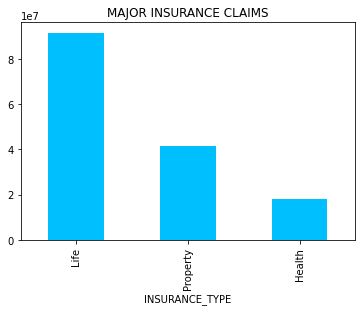

In [68]:
#TOP 3 INSURANCE TYPES WITH MAXIMUM CLAIMS ARE:
task_2.plot(kind="bar", color='#00bfff')
mat.title("MAJOR INSURANCE CLAIMS");

__LIFE , PROPERTY & HEALTH are the top 3 insurance types with major claims__

--

--

# TASK 3:

## __Finding top 5 states getting most claims and belongs to 'high risk'segment__

In [30]:
#checking on all the columns provided 
data.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1_x',
       'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x', 'POSTAL_CODE_x', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING',
       'ADDRESS_LINE1_y', 'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y',
       'POSTAL_CODE_y', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', 'VENDOR_NAME',
       'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE'],
      dtype='object')

In [38]:
#selecting the data which belongs to high risk segment for the ease of analysis
top_5 = data[data.RISK_SEGMENTATION=='H']

In [39]:
#GROUPING by STATE and calculacting sum of claim amount.

# task_3 consists of code which gives grouped sum of claim amount with respect to state and arranged in descending order

task_3=top_5.groupby('STATE_x')['CLAIM_AMOUNT'].sum().sort_values(ascending = False).head(5)

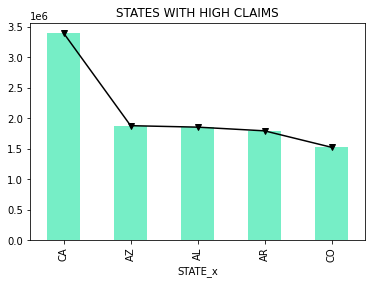

In [65]:
task_3.plot(kind="bar", color='#76eec6');
mat.plot(task_3, marker="v", color='black')
mat.title('STATES WITH HIGH CLAIMS');

__CA, AZ, AL,AR ,CO are the top 5 states which are getting great insurance claims which are in high risk segment__

--

--

# TASK 4:

__create a new variable “COLOCATION” which will have following values__ 

__IF Customer State == Incident State == Agent Address State__

__THEN 1 ELSE 0__

__Finding the mean of this new column__


In [75]:
#Creating the condition required as 'cdtn'
cdtn=(data['STATE_x']==data['STATE_y'])&(data['STATE_y']==data['STATE'])

In [76]:
#adding a new row in the data set "COLOCATION" with 0's as the initial value 
data['COLOCATION']=0

In [77]:
#applaying the logic
data['COLOCATION'][cdtn]=1

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\2135482416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['COLOCATION'][cdtn]=1


In [79]:
#required data
data.COLOCATION.value_counts()

0    9965
1      35
Name: COLOCATION, dtype: int64

__There are total of 35 entries where customer state, Incident state & Agent Adress State are same__

--

--

# TASK 5:

__Data entry errors was found if we go through AUTHORITY_CONTACTED was POLICE  but ,If we check the same in the column POLICE _REPORT_AVAILABLE was noted as '0' i.e a error__ 

In [82]:
## correcting the data by the column AUTHORITY_CONTACTED and re-writing in POLICE _REPORT_AVAILABLE

In [84]:
#selecting the data where police report is not noted in the column AUTHORITY_CONTACTED.
no_p=data[data.AUTHORITY_CONTACTED != 'Police']

In [86]:
#assigning values as 1 where AUTHORITY CONTACTED is POLICE
police=no_p[no_p[['POLICE_REPORT_AVAILABLE','AUTHORITY_CONTACTED']].POLICE_REPORT_AVAILABLE==1]

In [88]:
## apending this data to original data
police[['POLICE_REPORT_AVAILABLE','AUTHORITY_CONTACTED']].append(data)

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\3883053422.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  police[['POLICE_REPORT_AVAILABLE','AUTHORITY_CONTACTED']].append(data)


,POLICE_REPORT_AVAILABLE,AUTHORITY_CONTACTED,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,...,POSTAL_CODE_y,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COLOCATION
5,1,Ambulance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,Ambulance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1,Ambulance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,Ambulance,2021-06-30 00:00:00,TXN00009996,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,...,72703.0,35413882.0,LFOJ76068590051807,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,0,Police,2021-06-30 00:00:00,TXN00009997,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,...,31405.0,91206790.0,AHEF60771774635030,"Newton, Hodges and Henry",32512 Christine Drive,NaN,Union City,CA,94587.0,0.0
9997,1,None,2021-06-30 00:00:00,TXN00009998,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,...,40272.0,115241097.0,WREH18805592939657,Reese-Mckinney,20 Garfield Street,NaN,Needham,MA,2492.0,0.0
9998,1,Ambulance,2021-06-30 00:00:00,TXN00009999,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,...,72703.0,13995380.0,AAZI21883736448048,"Harmon, Manning and Bradley",1823 Dinger Road,NaN,Annapolis,MD,21402.0,0.0


In [89]:
data[['POLICE_REPORT_AVAILABLE','AUTHORITY_CONTACTED']]

,POLICE_REPORT_AVAILABLE,AUTHORITY_CONTACTED
0,1,Police
1,0,Ambulance
2,1,Police
3,0,Ambulance
4,1,Police
...,...,...
9995,1,Ambulance
9996,0,Police
9997,1,None
9998,1,Ambulance


In [90]:
#DATA ENTRYS ERRORS ARE CORRECTED


D:\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


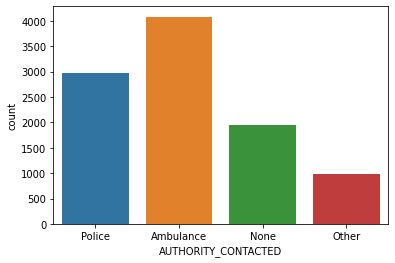

In [95]:
sbn.countplot(data.AUTHORITY_CONTACTED);

__Above shown is the count of Authority contacted at the spot of th incident__

--

--

# # TASK 6 :


__CLAIM_DEVIATION = AVG_CLAIM_AMOUNT_FOR_LAST_30DAYS (same insurance type)
/ CURRENT_CLAIM_AMOUNT__


__If the value < 0.5 THEN CLAIM_DEVIATION = 1 ELSE 0__

## "For type HEALTH"

In [133]:
##subsetting the required columns for the ease of analysis
it= data[['CLAIM_AMOUNT','TXN_DATE_TIME','INSURANCE_TYPE','TENURE']]

In [134]:
it

,CLAIM_AMOUNT,TXN_DATE_TIME,INSURANCE_TYPE,TENURE
0,9000,2020-06-01 00:00:00,Health,89
1,26000,2020-06-01 00:00:00,Property,80
2,13000,2020-06-01 00:00:00,Property,68
3,16000,2020-06-01 00:00:00,Health,16
4,3000,2020-06-01 00:00:00,Travel,16
...,...,...,...,...
9995,1000,2021-06-30 00:00:00,Motor,98
9996,67000,2021-06-30 00:00:00,Life,92
9997,8000,2021-06-30 00:00:00,Health,32
9998,2000,2021-06-30 00:00:00,Motor,44


In [135]:
#cd-h refers to claim deviation for health type
cd=it[(it.INSURANCE_TYPE=='Health') & (it.TENURE>30)]

In [136]:
cd.CLAIM_AMOUNT.mean()

10784.74320241692

In [137]:
cd['CLAIM_DEVIATION_v'] = cd.CLAIM_AMOUNT.mean()/cd.CLAIM_AMOUNT

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\704018390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['CLAIM_DEVIATION_v'] = cd.CLAIM_AMOUNT.mean()/cd.CLAIM_AMOUNT


In [138]:
#adding the data to the main data 
data['CLAIM_DEVIATION_v']=cd[['CLAIM_DEVIATION_v']]

In [139]:
# now defineing the data with 1's and 0's
# initially proving values as 1
data['CLAIM_DEVIATION']=1

In [140]:
# logic assignment which assigns the value 0 when claim deviation is greater than 0.5
data['CLAIM_DEVIATION'][data['CLAIM_DEVIATION_v']>0.5]=0

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\3681285559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLAIM_DEVIATION'][data['CLAIM_DEVIATION_v']>0.5]=0


In [141]:
#checking wheather values updated or not 
data['CLAIM_DEVIATION'].value_counts()

1    8676
0    1324
Name: CLAIM_DEVIATION, dtype: int64

__i.e there are 1324 values whose claim deviation is more than 0.5 in th Health insurance type__

# For type 'Property'

In [124]:
## repeating the same procedure for all types

In [142]:
cd_property=it[(it.INSURANCE_TYPE=='Property') & (it.TENURE>30)]

In [143]:
cd_property['CLAIM_DEVIATION_v'] = cd_property.CLAIM_AMOUNT.mean()/cd_property.CLAIM_AMOUNT

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\366985405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_property['CLAIM_DEVIATION_v'] = cd_property.CLAIM_AMOUNT.mean()/cd_property.CLAIM_AMOUNT


In [144]:
data['CLAIM_DEVIATION_v']=cd_property['CLAIM_DEVIATION_v']

In [145]:
N=data['CLAIM_DEVIATION_v']>0.5

In [146]:
data['CLAIM_DEVIATION'][N]=0

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\1866190612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLAIM_DEVIATION'][N]=0


In [147]:
data['CLAIM_DEVIATION'].value_counts()

1    7339
0    2661
Name: CLAIM_DEVIATION, dtype: int64

__now there are total of 2661 entries where claim deviation is more than 0.5__

# For the type 'Travel'

In [148]:
cd_travel=it[(it.INSURANCE_TYPE=='Travel') & (it.TENURE>30)]

In [149]:
cd_travel

,CLAIM_AMOUNT,TXN_DATE_TIME,INSURANCE_TYPE,TENURE
9,4000,2020-06-01 00:00:00,Travel,119
45,5000,2020-06-02 00:00:00,Travel,105
55,3000,2020-06-02 00:00:00,Travel,92
59,2000,2020-06-02 00:00:00,Travel,104
66,2000,2020-06-02 00:00:00,Travel,96
...,...,...,...,...
9946,2000,2021-06-28 00:00:00,Travel,107
9952,1000,2021-06-29 00:00:00,Travel,101
9957,4000,2021-06-29 00:00:00,Travel,84
9983,1000,2021-06-30 00:00:00,Travel,49


In [150]:
cd_travel['CLAIM_DEVIATION_v'] = cd_travel.CLAIM_AMOUNT.mean()/cd_travel.CLAIM_AMOUNT

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\2110974145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_travel['CLAIM_DEVIATION_v'] = cd_travel.CLAIM_AMOUNT.mean()/cd_travel.CLAIM_AMOUNT


In [151]:
data['CLAIM_DEVIATION_v']=cd_travel['CLAIM_DEVIATION_v']

In [152]:
R=data['CLAIM_DEVIATION_v']>0.5

In [153]:
data['CLAIM_DEVIATION'][R]=0

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\1421868262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLAIM_DEVIATION'][R]=0


In [154]:
data['CLAIM_DEVIATION'].value_counts()

1    6012
0    3988
Name: CLAIM_DEVIATION, dtype: int64

# For the type 'Life '


In [155]:
cd_Life=it[(it.INSURANCE_TYPE=='Travel') & (it.TENURE>30)]

In [156]:
cd_Life

,CLAIM_AMOUNT,TXN_DATE_TIME,INSURANCE_TYPE,TENURE
9,4000,2020-06-01 00:00:00,Travel,119
45,5000,2020-06-02 00:00:00,Travel,105
55,3000,2020-06-02 00:00:00,Travel,92
59,2000,2020-06-02 00:00:00,Travel,104
66,2000,2020-06-02 00:00:00,Travel,96
...,...,...,...,...
9946,2000,2021-06-28 00:00:00,Travel,107
9952,1000,2021-06-29 00:00:00,Travel,101
9957,4000,2021-06-29 00:00:00,Travel,84
9983,1000,2021-06-30 00:00:00,Travel,49


In [157]:
cd_Life['CLAIM_DEVIATION_v'] = cd_Life.CLAIM_AMOUNT.mean()/cd_Life.CLAIM_AMOUNT

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\1663313537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_Life['CLAIM_DEVIATION_v'] = cd_Life.CLAIM_AMOUNT.mean()/cd_Life.CLAIM_AMOUNT


In [159]:
cd_Life['CLAIM_DEVIATION_v']

9       0.746797
45      0.597438
55      0.995730
59      1.493595
66      1.493595
          ...   
9946    1.493595
9952    2.987189
9957    0.746797
9983    2.987189
9991    0.995730
Name: CLAIM_DEVIATION_v, Length: 1327, dtype: float64

In [158]:
data['CLAIM_DEVIATION_v']=cd_Life['CLAIM_DEVIATION_v']

In [160]:
LI=data['CLAIM_DEVIATION_v']>0.5

In [161]:
data['CLAIM_DEVIATION'][LI]=0

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\776282843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLAIM_DEVIATION'][LI]=0


In [162]:
data['CLAIM_DEVIATION'].value_counts()

1    6012
0    3988
Name: CLAIM_DEVIATION, dtype: int64

# For the type'Motor'

In [163]:
cd_Motor=it[(it.INSURANCE_TYPE=='Motor') & (it.TENURE>30)]

In [164]:
cd_Motor

,CLAIM_AMOUNT,TXN_DATE_TIME,INSURANCE_TYPE,TENURE
7,8000,2020-06-01 00:00:00,Motor,97
8,5000,2020-06-01 00:00:00,Motor,118
11,8000,2020-06-01 00:00:00,Motor,39
15,9000,2020-06-01 00:00:00,Motor,48
18,8000,2020-06-01 00:00:00,Motor,69
...,...,...,...,...
9974,10000,2021-06-29 00:00:00,Motor,108
9975,4000,2021-06-30 00:00:00,Motor,60
9990,7000,2021-06-30 00:00:00,Motor,52
9995,1000,2021-06-30 00:00:00,Motor,98


In [165]:
cd_Motor['CLAIM_DEVIATION_v'] = cd_Motor.CLAIM_AMOUNT.mean()/cd_Motor.CLAIM_AMOUNT

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\2706460226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_Motor['CLAIM_DEVIATION_v'] = cd_Motor.CLAIM_AMOUNT.mean()/cd_Motor.CLAIM_AMOUNT


In [166]:
cd_Motor['CLAIM_DEVIATION_v']

7       0.690462
8       1.104739
11      0.690462
15      0.613744
18      0.690462
          ...   
9974    0.552369
9975    1.380923
9990    0.789099
9995    5.523693
9998    2.761846
Name: CLAIM_DEVIATION_v, Length: 1224, dtype: float64

In [167]:
data['CLAIM_DEVIATION_v']=cd_Motor['CLAIM_DEVIATION_v']

In [169]:
MO=data['CLAIM_DEVIATION_v']>0.5

In [170]:
data['CLAIM_DEVIATION'][MO]=0

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\836006341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLAIM_DEVIATION'][MO]=0


In [171]:
data['CLAIM_DEVIATION'].value_counts()

0    5212
1    4788
Name: CLAIM_DEVIATION, dtype: int64

# For the type 'Mobile'

In [172]:
cd_Mobile=it[(it.INSURANCE_TYPE=='Motor') & (it.TENURE>30)]

In [173]:
cd_Mobile

,CLAIM_AMOUNT,TXN_DATE_TIME,INSURANCE_TYPE,TENURE
7,8000,2020-06-01 00:00:00,Motor,97
8,5000,2020-06-01 00:00:00,Motor,118
11,8000,2020-06-01 00:00:00,Motor,39
15,9000,2020-06-01 00:00:00,Motor,48
18,8000,2020-06-01 00:00:00,Motor,69
...,...,...,...,...
9974,10000,2021-06-29 00:00:00,Motor,108
9975,4000,2021-06-30 00:00:00,Motor,60
9990,7000,2021-06-30 00:00:00,Motor,52
9995,1000,2021-06-30 00:00:00,Motor,98


In [174]:
cd_Mobile['CLAIM_DEVIATION_v'] = cd_Mobile.CLAIM_AMOUNT.mean()/cd_Mobile.CLAIM_AMOUNT

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\339330627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_Mobile['CLAIM_DEVIATION_v'] = cd_Mobile.CLAIM_AMOUNT.mean()/cd_Mobile.CLAIM_AMOUNT


In [175]:
cd_Mobile['CLAIM_DEVIATION_v']

7       0.690462
8       1.104739
11      0.690462
15      0.613744
18      0.690462
          ...   
9974    0.552369
9975    1.380923
9990    0.789099
9995    5.523693
9998    2.761846
Name: CLAIM_DEVIATION_v, Length: 1224, dtype: float64

In [176]:
data['CLAIM_DEVIATION_v']=cd_Mobile['CLAIM_DEVIATION_v']

In [177]:
MOb=data['CLAIM_DEVIATION_v']>0.5

In [178]:
data['CLAIM_DEVIATION'][MOb]=0

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\3250968139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLAIM_DEVIATION'][MOb]=0


In [179]:
data['CLAIM_DEVIATION'].value_counts()

0    5212
1    4788
Name: CLAIM_DEVIATION, dtype: int64

__There fore there are total of 4788 entries where claim deviation is higher than 0.5__

--

--

# TASK 7

## Agents working with multiple Insurance claims

In [181]:
#Using group by clause with insurance type
agent = data.groupby('AGENT_ID')[[ 'INSURANCE_TYPE']].count()

In [182]:
agent

,INSURANCE_TYPE
AGENT_ID,
AGENT00001,10
AGENT00002,3
AGENT00003,11
AGENT00004,12
AGENT00005,5
...,...
AGENT01196,10
AGENT01197,6
AGENT01198,7


In [184]:
# appalying condition which gives agents id who are working with more than 2 insurance types
agents=agent[agent.INSURANCE_TYPE>2]

In [185]:
agents

,INSURANCE_TYPE
AGENT_ID,
AGENT00001,10
AGENT00002,3
AGENT00003,11
AGENT00004,12
AGENT00005,5
...,...
AGENT01196,10
AGENT01197,6
AGENT01198,7


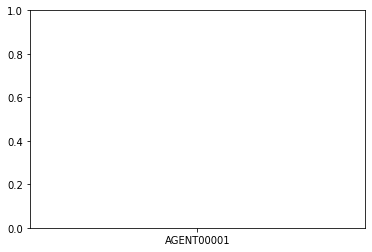

__Above are the all the agents working with more than 2 insurance types. There are total of 1191 agents__

--

--

# TASK 8:

## Finding Loyal Customers eligible for Discounts

__eligibility Criteria as follow__

__IF CUSTOMER_TENURE > 60 AND EMPLOYMENT_STATUS = “N”
AND NO_OF_FAMILY_MEMBERS >=4 THEN 1 ELSE 0__


In [186]:
#condition 
task_8=data[(data.TENURE>60)&(data.EMPLOYMENT_STATUS=="N")&(data.NO_OF_FAMILY_MEMBERS>=4)]

In [187]:
#creating a new column with value 1 
task_8['ELIGIBLE_FOR_DISCOUNT']=1

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_31340\1404752326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_8['ELIGIBLE_FOR_DISCOUNT']=1


In [188]:
task_8_1=task_8[['CUSTOMER_NAME','ELIGIBLE_FOR_DISCOUNT']]

In [189]:
task_8_1

,CUSTOMER_NAME,ELIGIBLE_FOR_DISCOUNT
23,Matt Mattis,1
53,Donald Meehan,1
62,Arthur Mitchell,1
68,William Martin,1
102,William Wilson,1
...,...,...
9751,Shirley Patterson,1
9859,Jack Lopez,1
9875,Lilliam Grimm,1
9929,Gale Gallegos,1


In [190]:
#merging with full data so show that eligible and non eligible persons
eligible=data.merge(task_8_1,how='left', on='CUSTOMER_NAME')

In [191]:
eligible.fillna(0,inplace=True)

In [192]:
eligible

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COLOCATION,CLAIM_DEVIATION_v,CLAIM_DEVIATION,ELIGIBLE_FOR_DISCOUNT
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,Ramsey Inc,3114 West 20th Court,0,Panama City,FL,32405.0,0,0.000000,0,0.0
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,"Morales, Campbell and Washington",42 West Louise Street,B,Fayetteville,AR,72701.0,0,0.000000,0,0.0
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,Johnson Ltd,2619 North Quality Lane,#315,Fayetteville,AR,72703.0,0,0.000000,0,0.0
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,Blackwell-Foster,3609 Meadow Drive,0,Nashville,TN,37215.0,0,0.000000,1,0.0
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,Evans-Scott,4001 19th Place Northeast,0,Washington,DC,20018.0,0,0.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-06-30 00:00:00,TXN00009996,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,105.75,1000,...,0,0,0,0,0,0.0,0,5.523693,0,0.0
9996,2021-06-30 00:00:00,TXN00009997,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,64.59,67000,...,"Newton, Hodges and Henry",32512 Christine Drive,0,Union City,CA,94587.0,0,0.000000,1,0.0
9997,2021-06-30 00:00:00,TXN00009998,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,183.50,8000,...,Reese-Mckinney,20 Garfield Street,0,Needham,MA,2492.0,0,0.000000,0,0.0
9998,2021-06-30 00:00:00,TXN00009999,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,113.46,2000,...,"Harmon, Manning and Bradley",1823 Dinger Road,0,Annapolis,MD,21402.0,0,2.761846,0,0.0


In [216]:
eligible.ELIGIBLE_FOR_DISCOUNT.value_counts()

0.0    9688
1.0     312
Name: ELIGIBLE_FOR_DISCOUNT, dtype: int64

__"There are 312 agents who are eligible for discount"__

--

--

# TASK 9:

## CLAIM_VELOCITY = NO_OF_CLAIMS_IN_LAST30DAYS / NO_OF_CLAIMS_IN_LAST3DAYS

In [193]:
# converting the data type object to datetime series 
data['TXN_DATE_TIME'] = pd.to_datetime(data.TXN_DATE_TIME)
data['day']= pd.DatetimeIndex(data.TXN_DATE_TIME).day
data['year']= pd.DatetimeIndex(data.TXN_DATE_TIME).year
data['month']= pd.DatetimeIndex(data.TXN_DATE_TIME).month

In [194]:
#last 30 days does not involve current day so excluding the last day assuming that as the curret day
task_9=data[(data.year==2021)&(data.month==6)&(data.day!=30)]

In [195]:
task_9.CLAIM_STATUS.value_counts()

A    722
D     37
Name: CLAIM_STATUS, dtype: int64

In [196]:
#last 3 days also does not involve current so excluding tha last day i.e 30th and including the last 3 days i.e 27,28,29
task_9_1=data[(data.year==2021)&(data.month==6)&(data.day.isin([29,28,27]))]

In [197]:
task_9_1.CLAIM_STATUS.value_counts()

A    73
D     5
Name: CLAIM_STATUS, dtype: int64

In [198]:
CLAIM_VELOCITY = 722/73

In [199]:
CLAIM_VELOCITY

9.89041095890411

__There fore the CLAIM VELOCITY IS '9.89041095890411'__

--

--

# TASK 10:

__IF TOTAL CLAIM AMOUNT which meet below criteria is >= 15000 THEN AGENT is classified
as Suspicious ELSE NoT__
__If Suspicious, then 1 ELSE 0.__

In [200]:
# arranging agents on basis of their claim amount
data.groupby('AGENT_NAME')[['CLAIM_AMOUNT']].sum().sort_values('CLAIM_AMOUNT',ascending=False)

,CLAIM_AMOUNT
AGENT_NAME,
Don Filkins,528800
Clara Barnett,489000
Roger Burns,422100
Robert Ward,417100
Salvador Soriano,400400
...,...
Mary Franklin,5600
Thelma Salinas,5500
Richard Murphy,5300


In [202]:
#grouping by claim amount then arrangening in ascending order
sus=data.groupby('AGENT_NAME')[['CLAIM_AMOUNT']].sum().sort_values('CLAIM_AMOUNT',ascending=True)

In [203]:
sus

,CLAIM_AMOUNT
AGENT_NAME,
Nichole Wright,800
Sandra Tucker,4200
Richard Murphy,5300
Thelma Salinas,5500
Mary Franklin,5600
...,...
Salvador Soriano,400400
Robert Ward,417100
Roger Burns,422100


In [208]:
# writing condition for suspecious agents
sus[sus.CLAIM_AMOUNT>=15000]

,CLAIM_AMOUNT,Suspicious
AGENT_NAME,,
David Brandenberger,15000,0
Vincent Ragan,15500,0
Michael Wolfe,16100,0
John Kirby,16200,0
Matthew Stepp,16600,0
...,...,...
Salvador Soriano,400400,0
Robert Ward,417100,0
Roger Burns,422100,0


In [205]:
sus['Suspicious']=1

In [206]:
sus['Suspicious'][sus.CLAIM_AMOUNT>=15000]=0

In [207]:
sus

,CLAIM_AMOUNT,Suspicious
AGENT_NAME,,
Nichole Wright,800,1
Sandra Tucker,4200,1
Richard Murphy,5300,1
Thelma Salinas,5500,1
Mary Franklin,5600,1
...,...,...
Salvador Soriano,400400,0
Robert Ward,417100,0
Roger Burns,422100,0


In [214]:
sus.Suspicious.value_counts()

0    1182
1      16
Name: Suspicious, dtype: int64

__"There are a total of 16 Agents who are Suspicious__"

# THANKYOU FOR THE PATIENCE!!